<a href="https://colab.research.google.com/github/torix/LectureOfComplexNetworks/blob/2019/ComplexNetwork01_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ネットワーク指標の計算

NetworkXを使って様々なネットワークの指標を計算します．

NetworkXのドキュメントは，https://networkx.github.io/documentation/stable/index.html を参考．


# 0．準備

## 0.1. 日本語の表示

一番最初にGoogleColaboratory上で図に日本語を利用するためのおまじないを実行します．


以下のコードを実行して，出力された値を次のコードに書いて実行します．<br>
最初に一度だけ行ってください．

In [0]:
import matplotlib
%matplotlib inline

!apt-get -y install fonts-ipafont-gothic
import matplotlib
!rm /root/.cache/matplotlib/fontlist-v300.json


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


ここまで実行後，一度ランタイムをリブートします．

一度実行後は，ここまでのコードは実行する必要がありません．




## 0.1. NetworkXの準備

ネットワークのライブラリであるNetworkXと，描画用にmatplotlibの中のpyplotをインポートします．<br>
%matplotlib inlineはjupyter内でグラフを表示するためのおまじないです．

ついでに，ネットワーク読み込み用の関数もここで定義しておきます．





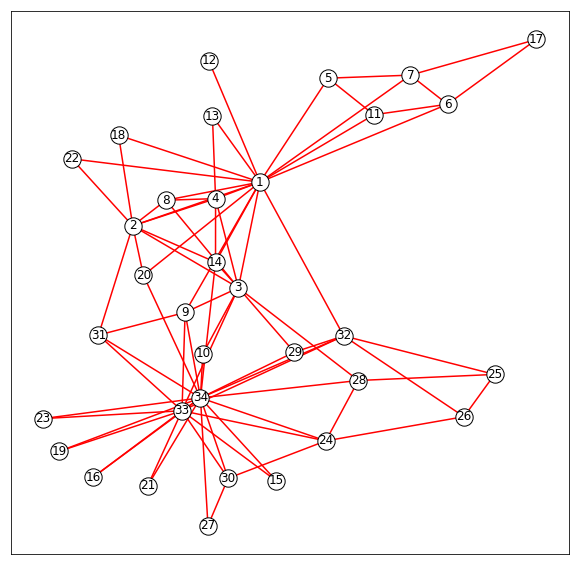

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline

import requests
from google.colab import files

def readNetwork(url=None, splitter=","):
  # ネットワークを読み込む
  if url == None:
    uploaded = files.upload()
    edge_text = list(uploaded.values())[0].decode()
  else:
    res = requests.get(url)
    res.encoding = res.apparent_encoding
    edge_text = res.text

  # edgeとして読み込める形式に変換
  edge_list = list(item.split(splitter) for item in edge_text.split("\n"))
  edge_list = [a for a in edge_list if len(a) != 1]
  # 無向グラフを作成
  G = nx.Graph() 

  # ネットワークの作成
  G.add_edges_from(edge_list)
  return G

def showNetwork(G, node_value=None):
  #描画する
  # 描画サイズ
  plt.figure(figsize=(10,10))
  # ノードをバネモデルで配置する
  pos = nx.spring_layout(G, k=0.3, seed=0)
  # ノード，エッジ，ラベルの描画
  nx.draw_networkx_edges(G, pos, edge_color='red', width=1.5)
  if node_value == None:
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_nodes(G, pos, node_color='white', edgecolors="black")
  else:
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_nodes(G, pos, node_color=list(node_value.values()), cmap=plt.cm.Reds, edgecolors="black")
  
  # 描画
  plt.show()


G = readNetwork("http://syrinx.q.t.u-tokyo.ac.jp/tori/lecture/complexnetworks/karate.dat")
showNetwork(G)


# 1. ネットワーク指標の計算

## 1.1. 次数
### 1.1.1．平均次数

各ノードが持つノードの次数の平均を平均次数と言います．

おおよそどのくらいリンクがあるのかをみるための指標としてよく使われます．




In [0]:
from statistics import mean, median,variance,stdev

degree = G.degree #次数を取得
d_ary = dict(degree).values() #次数のリスト
print(mean(d_ary)) #平均
print(median(d_ary)) #中央値
print(variance(d_ary)) #分散
print(stdev(d_ary)) #標準偏差
print(max(d_ary)) #最大値
print(min(d_ary)) #最小値




4.588235294117647
3.0
15.037433155080214
3.8778129345135013
17
1


### 1.1.2 次数分布


次数がどの程度のノードがどのくらい存在するのかを求めたものが次数分布です．









次数の分布
[(1, 1), (2, 11), (3, 6), (4, 6), (5, 3), (6, 2), (9, 1), (10, 1), (12, 1), (16, 1), (17, 1)]


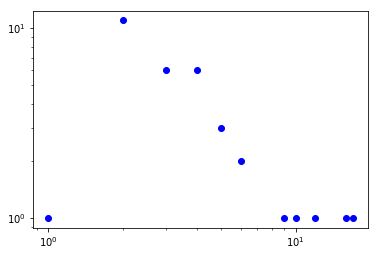

In [0]:
import collections

# 次数分布を取得
degree = G.degree
degree_distribution = collections.Counter(dict(degree).values()) # 次数を次数分布のヒストグラムに変換
print("次数の分布")
print(sorted(degree_distribution.items(), key=lambda x:x[0]))


# 次数分布をプロットする
plt.plot(degree_distribution.keys(), degree_distribution.values(), 'bo') #次数分布をプロット

# 両対数グラフをやめる場合は，この二つのコメントアウトをします．
plt.xscale('log') 
plt.yscale('log')


plt.show()

## 1.2. ネットワークの凝集性

### 1.2.1. リンク密度

完全グラフ（すべてのノードがお互いに隣接している状態）を1としたときに，
実際にリンクが張られている割合を示したものがリンク密度です．

ネットワーク内のノードがどのくらい密につながり合っているかを示す指標です．
大域的な凝集性を示します．

### 1.2.2. クラスタ係数
あるノードの隣接ノード同士が隣接している割合を示す係数です．
局所的な凝集性を示します．




In [0]:
# ネットワーク密度
print(nx.density(G))

#クラスタ係数
print(nx.average_clustering(G)) #クラスタ係数の平均
clustering_coefficient = nx.clustering(G) 
print(dict(clustering_coefficient)) #ノードごとのクラスタ係数


0.13903743315508021
0.5706384782076824
{'2': 0.3333333333333333, '1': 0.15, '3': 0.24444444444444444, '4': 0.6666666666666666, '5': 0.6666666666666666, '6': 0.5, '7': 0.5, '8': 1.0, '9': 0.5, '10': 0, '11': 0.6666666666666666, '12': 0, '13': 1.0, '14': 0.6, '17': 1.0, '18': 1.0, '20': 0.3333333333333333, '22': 1.0, '26': 0.3333333333333333, '24': 0.4, '25': 0.3333333333333333, '28': 0.16666666666666666, '29': 0.3333333333333333, '30': 0.6666666666666666, '27': 1.0, '31': 0.5, '32': 0.2, '33': 0.19696969696969696, '15': 1.0, '16': 1.0, '19': 1.0, '21': 1.0, '23': 1.0, '34': 0.11029411764705882}


## 1.2．ネットワークの大きさ

ネットワークの大きさを示す指標として，

*   平均経路長
*   直径

などがあります．




In [38]:
print("平均経路長")
print(nx.average_shortest_path_length(G)) #平均経路長
print("直径")
print(nx.diameter(G)) #直径


平均経路長
2.408199643493761
直径
5


## 1.3. 次数相関

次数相関は，隣接するノードの次数の相関を表します．

次数相関がプラスの場合，次数が高いノードは次数が高いノードと，次数が低いノードは次数が低いノードとつながりがちであることを意味します．

逆に次数相関がマイナスだと，次数が高いノードは低いノードと隣接する可能性が高いことを意味します．

一般に自然界で作られるネットワークでは次数相関はマイナスとなり，人工的なネットワークでは次数相関がプラスになりやすいと言われています．


In [39]:
print("次数相関")
nx.degree_assortativity_coefficient(G)

次数相関


-0.47561309768461457

## 1.4. 中心性

### 1.4.1.次数中心性
どの程度次数を持っているかによってノードの中心性を評価する指標です．

次数の値そのものを利用します．

ハブノードの中心性が高くなります．




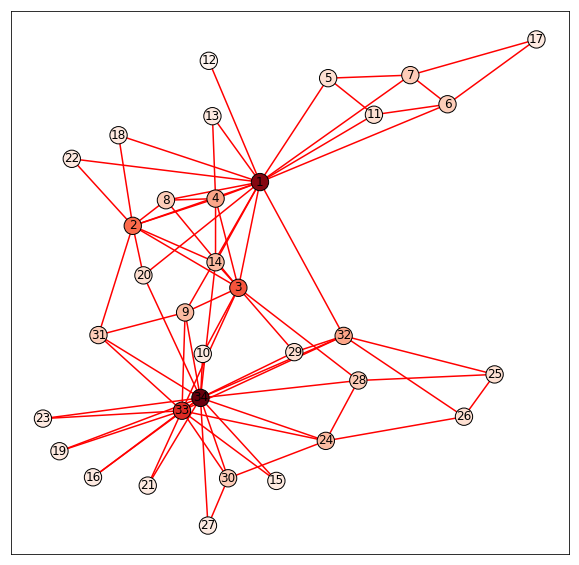

In [0]:
# degre_centrality の計算
pr = nx.pagerank(G)
degree_centralities = nx.degree_centrality(G)

showNetwork(G, degree_centralities)



### 1.4.2. 近接中心性

他のノードへの距離が近いノードほど高い値を示す中心性指標です．
ネットワークの中央にいるのか，周辺にいるのかが分かります．

すべての他のノードからの距離の逆数によって算出します．


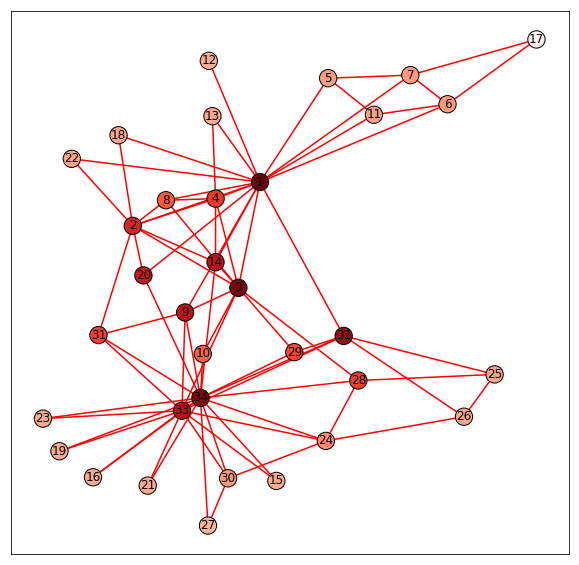

In [0]:

showNetwork(G, nx.closeness_centrality(G))




### 1.4.3. 媒介中心性

ネットワーク全体の接続性を確保するためにどのくらい重要なノードかを示す指標です．

任意の二つのノードの最短経路上に存在する可能性が高ければ高いほど高い値を示します．



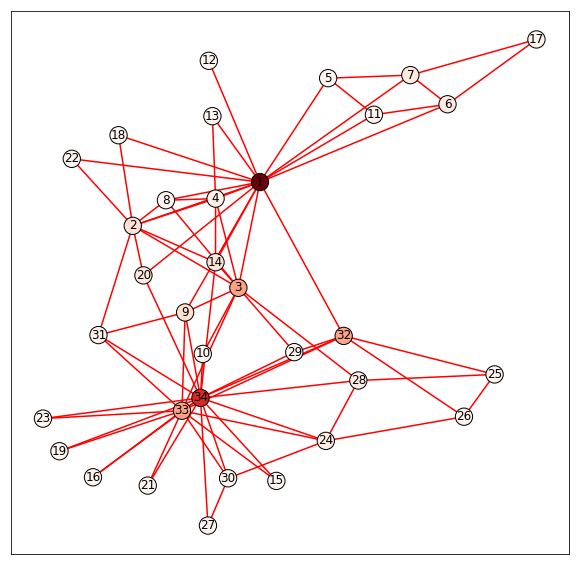

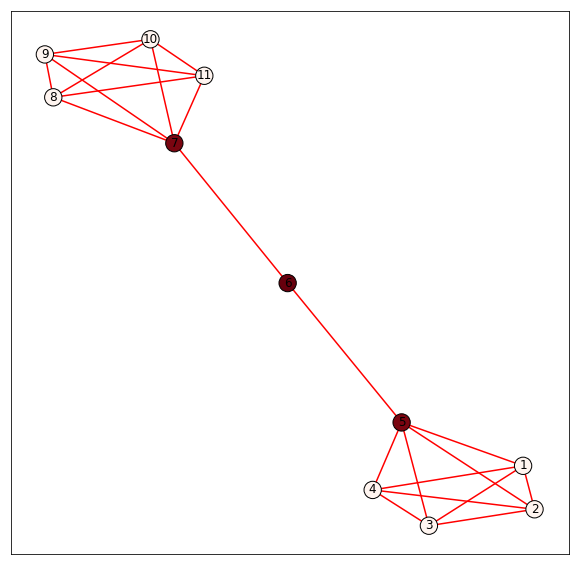

In [34]:
showNetwork(G, nx.betweenness_centrality(G))

# バーベルグラフによるBetweeness
barbellG = readNetwork("http://syrinx.q.t.u-tokyo.ac.jp/tori/lecture/complexnetworks/barbell-graph.dat")
showNetwork(barbellG, nx.betweenness_centrality(barbellG))


### 1.4.4. ページランク

ページランクは，「リンクがより多く集まっているWEBページはより重要である」という考えに基づいて
Googleの創設者の一人であるラリーペイジが開発した中心性手法です．




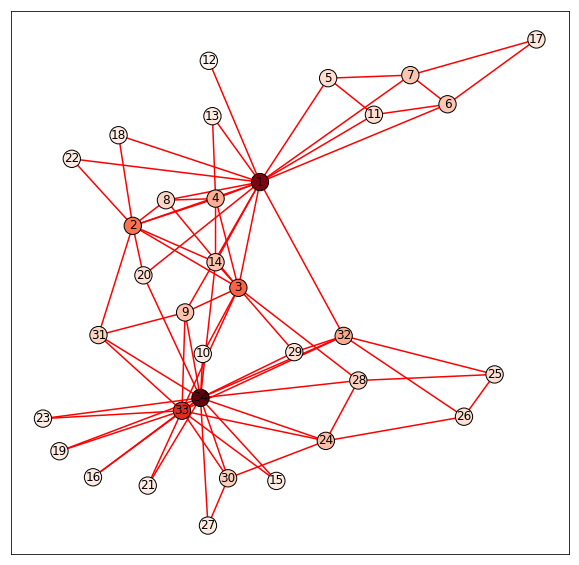

In [35]:
showNetwork(G, nx.pagerank(G))

